In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [126]:
Liver_df = pd.read_csv('indian_liver_patient.csv')
Liver_df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [127]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
Liver_df['Gender'] = l.fit_transform(Liver_df['Gender'])
Liver_df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,1,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [128]:
Liver_df.Albumin_and_Globulin_Ratio = Liver_df.Albumin_and_Globulin_Ratio.fillna(Liver_df['Albumin_and_Globulin_Ratio'].mean())
Liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [129]:
corr_matrix = Liver_df.corr()
corr_matrix['Dataset']*100

Age                           -13.735063
Gender                         -8.241591
Total_Bilirubin               -22.020756
Direct_Bilirubin              -24.604634
Alkaline_Phosphotase          -18.486561
Alamine_Aminotransferase      -16.341616
Aspartate_Aminotransferase    -15.193375
Total_Protiens                  3.500824
Albumin                        16.138782
Albumin_and_Globulin_Ratio     16.231913
Dataset                       100.000000
Name: Dataset, dtype: float64

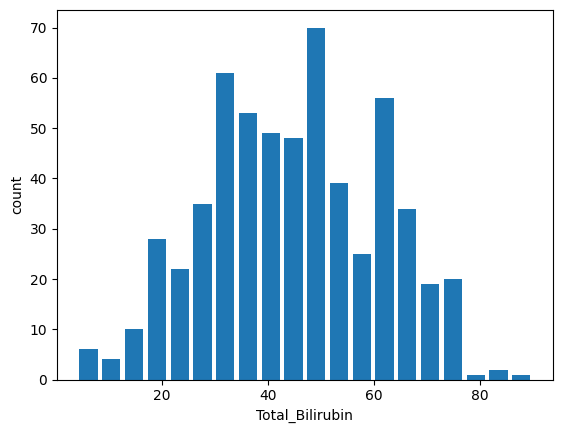

In [130]:
plt.hist(Liver_df.Age, bins=20, rwidth=0.8)
plt.xlabel('Total_Bilirubin')
plt.ylabel('count')
plt.show()

In [131]:
Liver_df['Age'].describe()

count    583.000000
mean      44.746141
std       16.189833
min        4.000000
25%       33.000000
50%       45.000000
75%       58.000000
max       90.000000
Name: Age, dtype: float64

In [132]:
# df_cols = ['Total_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']
# df_cols

In [133]:
# Indexes = []
# for a in df_cols:
#     per_75, per_25 = Liver_df[a].quantile(0.75), Liver_df[a].quantile(0.25)
#     iqr = per_75 - per_25
#     upperLimit, lowerLimit = per_75 + 1.5 * iqr, per_25 - 1.5 * iqr
    
#     i = Liver_df.loc[(Liver_df[a]>upperLimit) | (Liver_df[a]<lowerLimit)].index
#     for ele in i:
#         if ele not in Indexes:
#             Indexes.append(ele)
      
# len(Indexes)

In [134]:
# # len(Indexes) # 129
# df_clean = Liver_df.drop(index=Indexes)
# df_clean.shape

In [135]:
# X =  Liver_df.drop(['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Dataset','Total_Protiens'], axis=1)
X =  Liver_df.drop(['Dataset','Total_Protiens','Alamine_Aminotransferase','Total_Protiens','Direct_Bilirubin','Total_Bilirubin'], axis=1)
y = Liver_df['Dataset']
X

,Age,Gender,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio
0,65,0,187,18,3.3,0.90
1,62,1,699,100,3.2,0.74
2,62,1,490,68,3.3,0.89
3,58,1,182,20,3.4,1.00
4,72,1,195,59,2.4,0.40
...,...,...,...,...,...,...
578,60,1,500,34,1.6,0.37
579,40,1,98,31,3.2,1.10
580,52,1,245,49,3.2,1.00
581,31,1,184,32,3.4,1.00


In [136]:
# plt.figure(figsize=(15,15))
# plt.subplot(2, 2, 1)
# sns.boxplot(Liver_df['Albumin_and_Globulin_Ratio'])
# per_75_1, per_25_1 = Liver_df['Albumin_and_Globulin_Ratio'].quantile(0.75), Liver_df['Albumin_and_Globulin_Ratio'].quantile(0.25)
# iqr_1 = per_75_1 - per_25_1
# upperLimit_1, lowerLimit_1 = (per_75_1 + 1.5*iqr_1), (per_25_1 - 1.5 * iqr_1)
# clean_dataframe = pd.DataFrame(Liver_df[(Liver_df['Albumin_and_Globulin_Ratio']<upperLimit_1) & (Liver_df['Albumin_and_Globulin_Ratio']>lowerLimit_1)])
# plt.subplot(2, 2, 2)
# sns.boxplot(clean_dataframe['Albumin_and_Globulin_Ratio'])
# Liver_df['Albumin_and_Globulin_Ratio'].describe()
# b = ['Total_Bilirubin','Alkaline_Phosphotase','Aspartate_Aminotransferase','Albumin_and_Globulin_Ratio']

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape)
X_train.shape[0]+ X_test.shape[0]

(466, 6) (117, 6)


583

In [138]:
a = {}
a

{}

In [139]:
# Logistic Regression


from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1',solver='liblinear')
lr.fit(X_train,y_train)
lr_score = lr.score(X_test,y_test)*100
a['LogisticRegression'] = lr_score

In [140]:
from sklearn.svm import SVC
Score = {}
C = [1,10,20,30]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto']
for c in C:
    for k in kernel:
        model = SVC(C=c,kernel=k)
        model.fit(X_train,y_train)
        acc = model.score(X_test,y_test)*100
        Score[c,k] = acc      
                
tunedVal = max(Score,key=Score.get)
tunedVal,max(Score.values())


((30, 'linear'), 74.35897435897436)

In [141]:
# Support Vectior Machine

s = SVC(C=30, kernel='linear',gamma='auto')
s.fit(X_train,y_train)
s_score = s.score(X_test,y_test)*100 # after tuning 68.37606837606837
a['SVC'] = s_score


In [142]:
from sklearn.ensemble import RandomForestClassifier
RF_score = {}
n_estimators = [50,75,100,150,200]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['sqrt', 'log2']
for n in n_estimators:
    for c in criterion:
        for mf in max_features:
            RF_model = RandomForestClassifier(n_estimators=n,criterion=c,max_features=mf)
            RF_model.fit(X_train,y_train)
            acc = RF_model.score(X_test,y_test)*100
            RF_score[n,c,mf] = acc
            
RF_tunedVal = max(RF_score,key=RF_score.get)
RF_tunedVal,max(RF_score.values())


((50, 'gini', 'log2'), 69.23076923076923)

In [143]:
# Random FOrest

rf = RandomForestClassifier(n_estimators=150,criterion='gini',max_features='sqrt')
rf.fit(X_train,y_train)
rf_score = rf.score(X_test,y_test)*100
a['RandomForestClassifier'] = rf_score

In [144]:
# from sklearn.decomposition import PCA
# p = PCA(0.95)
# X_pca = p.fit_transform(X)
# X_pca

# X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y, test_size=0.2, random_state=1)
# lr.fit(X_train_pca,y_train)
# lr.score(X_test_pca, y_test)*100

In [145]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_score = nb.score(X_test,y_test)*100
a['GaussianNB'] = nb_score

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn_Score = {}
n_neighbors = [3,5,10,15,20,50]
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree']

for n in n_neighbors:
    for w in weights:
        for a in algorithm:
            knn_model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
            knn_model.fit(X_train,y_train)
            knn_acc = knn_model.score(X_test,y_test)*100
            knn_Score[n,w,a] = knn_acc
            
knn_tunedVal = max(knn_Score,key=knn_Score.get)          
knn_tunedVal, max(knn_Score.values())


((5, 'uniform', 'auto'), 71.7948717948718)

In [150]:
# k nearest neighbors
# from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier();
knn.fit(X_train,y_train)
knn_scr = knn.score(X_test, y_test)*100
a['KNeighborsClassifier'] = knn_scr

TypeError: 'str' object does not support item assignment

In [ ]:
from sklearn import tree
DT_Score = {}
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

for c in criterion:
    for s in splitter:
        for mf in max_features:
            DT_model = tree.DecisionTreeClassifier(criterion=c, splitter=s, max_features=mf)
            DT_model.fit(X_train,y_train)
            DT_acc = DT_model.score(X_test,y_test)*100
            DT_Score[c,s,mf] = DT_acc

DT_tunedVal = max(DT_Score,key=DT_Score.get)          
DT_tunedVal, max(DT_Score.values())

(('log_loss', 'random', 'sqrt'), 68.37606837606837)

In [ ]:
# Decision Tree

t = tree.DecisionTreeClassifier(criterion='gini', splitter='random',max_features='log2')
t.fit(X_train,y_train)
t_score = t.score(X_test,y_test)*100 # after tuning 71
a['tree'] = t_score

In [ ]:
a

{'LogisticRegression': 75.21367521367522,
 'SVC': 74.35897435897436,
 'RandomForestClassifier': 67.52136752136752,
 'GaussianNB': 57.26495726495726,
 'KNeighborsClassifier': 71.7948717948718,
 'tree': 70.94017094017094}